
# Week 3  Lab - Exploratory Data Analysis (EDA)

<img align="right" style="padding-right:10px;" src="figures_wk3/curious.png" width=300><br>
This week's assignment will focus on EDA techniques and practices for a given dataset.

## Dataset for Week3: 
**Dataset Name::** <br>
Use any dataset that is of interest to you for this assignment.

   * https://archive.ics.uci.edu/ml/datasets.php
   * https://www.data.gov/
   * https://www.kaggle.com/datasets


# Assignment Requirements

Complete an Exploratory data analysis for the CHR 2021 dataset. Your analysis should include the following. For each of the following sections, please provide a narritive of your approach, reasoning for your treatment of the data and insights or conclusions that you have reached.

Define a few questions that you wish to discover about your dataset to guide your EDA effort.
   1. Describe the data within the dataset.
       - Data types: Categorical vs Continuous variables
       - Statistical summary, etc.
   2. Data Cleaning
       - Identify and handle missing values
       - Identify and handle outliers
   3. Feature Selection
       - Graphical visualization of features 
       - Examine the relationships within the dataset - using 2 different methods
       - Reduction of the dimensionality of the dataset
   4. Insights and Findings
       - Describe an insights and/or findings from within the datset.
   5. Bonus: Feature Engineering
       - Create a new feature based for findings.
       
**Important:** Make sure your provide complete and thorough explanations for all of your analysis steps. You need to defend your thought processes and reasoning.

# Deliverables:
Upload your Jupyter Notebook to the corresponding location in WorldClass. Also, you will need to provide a copy of your dataset.

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.

I am conducting an EDA on currnt Milwaukee crime data from the City of Milwaukee's open data portal: https://data.milwaukee.gov/dataset/wibr/resource/87843297-a6fa-46d4-ba5d-cb342fb2d3bb

In [1]:
#loading pandas, reading data, and taking a peek at the columns
import pandas as pd

In [2]:
crime = pd.read_csv('wibr.csv')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30208 entries, 0 to 30207
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IncidentNum       30208 non-null  object 
 1   ReportedDateTime  30208 non-null  object 
 2   ReportedYear      30208 non-null  int64  
 3   ReportedMonth     30208 non-null  int64  
 4   Location          29672 non-null  object 
 5   WeaponUsed        10373 non-null  object 
 6   ALD               29759 non-null  float64
 7   NSP               17113 non-null  float64
 8   POLICE            29809 non-null  float64
 9   TRACT             29730 non-null  float64
 10  WARD              29791 non-null  float64
 11  ZIP               29937 non-null  float64
 12  RoughX            29938 non-null  float64
 13  RoughY            29938 non-null  float64
 14  Arson             30208 non-null  int64  
 15  AssaultOffense    30208 non-null  int64  
 16  Burglary          30208 non-null  int64 

In [3]:
crime.head()

,IncidentNum,ReportedDateTime,ReportedYear,ReportedMonth,Location,WeaponUsed,ALD,NSP,POLICE,TRACT,...,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
0,223010060,2022-10-28 10:45:00,2022,10,4171 N MONTREAL ST,PERSONAL WEAPON,7.0,1.0,7.0,4100.0,...,0,1,0,0,0,0,0,0,0,0
1,223010059,2022-10-28 10:00:00,2022,10,2449 W CUSTER AV,FIREARM,NaN,3.0,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,223010041,2022-10-28 08:05:00,2022,10,3880 N 24TH ST,NaN,6.0,4.0,5.0,4700.0,...,1,0,0,0,0,0,0,0,0,0
3,223010039,2022-10-28 07:00:00,2022,10,3216 N ACHILLES ST,"ASPHYXIATION,PERSONAL WEAPON",6.0,6.0,5.0,7000.0,...,0,1,0,0,0,0,0,0,0,0
4,223010036,2022-10-28 06:30:00,2022,10,2550 N DOUSMAN ST,PERSONAL WEAPON,3.0,7.0,5.0,7900.0,...,0,1,0,0,0,0,0,0,0,0


We have just over 30,000 record in this dataset. Columns include date/time, year, and month of the crime, location (address) whether or not a weapon was used (categorical), aldermanic district (I believe), NSP (unclear what this is), police district, and tract. The final columns are categorical crime variables coded 1 (yes) or 0 (no). For instance, row 3 was an arson crime because there is a 1 in the Arson column. I only see one missing value in the first five rows (WeaponUsed). I'll need to dig a little deeper to see if that means weapon use was unknown, or a weapon was not used, and potentially transform the data accordingly.

In [4]:
#looking at missing values
crime.isnull().sum()

IncidentNum             0
ReportedDateTime        0
ReportedYear            0
ReportedMonth           0
Location              536
WeaponUsed          19835
ALD                   449
NSP                 13095
POLICE                399
TRACT                 478
WARD                  417
ZIP                   271
RoughX                270
RoughY                270
Arson                   0
AssaultOffense          0
Burglary                0
CriminalDamage          0
Homicide                0
LockedVehicle           0
Robbery                 0
SexOffense              0
Theft                   0
VehicleTheft            0
dtype: int64

In [5]:
crime['WeaponUsed'].fillna("None", inplace=True)
crime.head()

,IncidentNum,ReportedDateTime,ReportedYear,ReportedMonth,Location,WeaponUsed,ALD,NSP,POLICE,TRACT,...,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
0,223010060,2022-10-28 10:45:00,2022,10,4171 N MONTREAL ST,PERSONAL WEAPON,7.0,1.0,7.0,4100.0,...,0,1,0,0,0,0,0,0,0,0
1,223010059,2022-10-28 10:00:00,2022,10,2449 W CUSTER AV,FIREARM,NaN,3.0,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,223010041,2022-10-28 08:05:00,2022,10,3880 N 24TH ST,None,6.0,4.0,5.0,4700.0,...,1,0,0,0,0,0,0,0,0,0
3,223010039,2022-10-28 07:00:00,2022,10,3216 N ACHILLES ST,"ASPHYXIATION,PERSONAL WEAPON",6.0,6.0,5.0,7000.0,...,0,1,0,0,0,0,0,0,0,0
4,223010036,2022-10-28 06:30:00,2022,10,2550 N DOUSMAN ST,PERSONAL WEAPON,3.0,7.0,5.0,7900.0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
crime.isnull().sum()

IncidentNum             0
ReportedDateTime        0
ReportedYear            0
ReportedMonth           0
Location              536
WeaponUsed              0
ALD                   449
NSP                 13095
POLICE                399
TRACT                 478
WARD                  417
ZIP                   271
RoughX                270
RoughY                270
Arson                   0
AssaultOffense          0
Burglary                0
CriminalDamage          0
Homicide                0
LockedVehicle           0
Robbery                 0
SexOffense              0
Theft                   0
VehicleTheft            0
dtype: int64

In [7]:
crime.drop(['Location', 'NSP', 'TRACT', 'WARD', 'RoughX', 'RoughY'], axis=1, inplace=True)
crime.isnull().sum()

IncidentNum           0
ReportedDateTime      0
ReportedYear          0
ReportedMonth         0
WeaponUsed            0
ALD                 449
POLICE              399
ZIP                 271
Arson                 0
AssaultOffense        0
Burglary              0
CriminalDamage        0
Homicide              0
LockedVehicle         0
Robbery               0
SexOffense            0
Theft                 0
VehicleTheft          0
dtype: int64

In [8]:
#getting a sense of how much overlap there is between the missing ALD, POLICE, and ZIP rows
crime[crime.isnull().values.any(axis=1)]

,IncidentNum,ReportedDateTime,ReportedYear,ReportedMonth,WeaponUsed,ALD,POLICE,ZIP,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
1,223010059,2022-10-28 10:00:00,2022,10,FIREARM,NaN,NaN,53209.0,0,1,0,0,0,0,0,0,0,0
57,222990153,2022-10-26 18:54:00,2022,10,NONE,NaN,2.0,53215.0,0,0,0,0,0,0,1,0,0,0
127,222980028,2022-10-25 07:50:00,2022,10,PERSONAL WEAPON,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0
204,222960176,2022-10-23 22:00:00,2022,10,None,11.0,NaN,53219.0,0,1,0,0,0,0,0,0,0,0
285,222950090,2022-10-22 15:39:48,2022,10,None,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29788,220050026,2022-01-04 22:30:00,2022,1,None,NaN,NaN,NaN,0,0,0,1,0,1,0,0,0,0
29821,220040116,2022-01-04 17:35:00,2022,1,None,NaN,NaN,53215.0,0,0,0,0,0,0,0,0,0,1
29873,220040017,2022-01-04 06:35:00,2022,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1
29984,220020125,2022-01-02 20:45:00,2022,1,None,NaN,7.0,53225.0,0,0,0,1,0,0,0,0,0,0


In [9]:
crime.POLICE.isnull().sum()/crime.shape[0] * 100

1.3208421610169492

The remaining rows with missing values represent just over 1% of the total dataset, and there is quite a bit of overlap in the missing ALD, POLICE, and ZIP columns (if one is missing, the other two often are as well). Since those columns would be the most likely to help predict one another and there are relatively few values that could be used for prediction, I'm making the decision to drop those rows from the dataset.

In [10]:
crime.dropna(subset=['ALD','POLICE', 'ZIP'], inplace=True)
crime.head()

,IncidentNum,ReportedDateTime,ReportedYear,ReportedMonth,WeaponUsed,ALD,POLICE,ZIP,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
0,223010060,2022-10-28 10:45:00,2022,10,PERSONAL WEAPON,7.0,7.0,53216.0,0,1,0,0,0,0,0,0,0,0
2,223010041,2022-10-28 08:05:00,2022,10,None,6.0,5.0,53206.0,1,0,0,0,0,0,0,0,0,0
3,223010039,2022-10-28 07:00:00,2022,10,"ASPHYXIATION,PERSONAL WEAPON",6.0,5.0,53212.0,0,1,0,0,0,0,0,0,0,0
4,223010036,2022-10-28 06:30:00,2022,10,PERSONAL WEAPON,3.0,5.0,53212.0,0,1,0,0,0,0,0,0,0,0
5,223010034,2022-10-28 06:20:00,2022,10,None,1.0,7.0,53218.0,0,1,0,0,0,0,0,0,0,0


Next I'm going to create a "Crime Category" column combining the data from the final 10 columns.

In [11]:
import numpy as np

In [12]:
types = [
    (crime['Arson']==1), 
    (crime['AssaultOffense']==1),
    (crime['Burglary']==1),
    (crime['CriminalDamage']==1),
    (crime['Homicide']==1),
    (crime['LockedVehicle']==1),
    (crime['Robbery']==1),
    (crime['SexOffense']==1),
    (crime['Theft']==1),
    (crime['VehicleTheft']==1)]

In [13]:
values = ['Arson', 'Assault Offense', 'Burglary', 'Criminal Damage', 'Homicide', 'Locked Vehicle', 'Robbery', 'Sex Offense', 'Theft', 'Vehicle Theft']

In [14]:
crime['CrimeType'] = np.select(types, values)

In [15]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29750 entries, 0 to 30207
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IncidentNum       29750 non-null  object 
 1   ReportedDateTime  29750 non-null  object 
 2   ReportedYear      29750 non-null  int64  
 3   ReportedMonth     29750 non-null  int64  
 4   WeaponUsed        29750 non-null  object 
 5   ALD               29750 non-null  float64
 6   POLICE            29750 non-null  float64
 7   ZIP               29750 non-null  float64
 8   Arson             29750 non-null  int64  
 9   AssaultOffense    29750 non-null  int64  
 10  Burglary          29750 non-null  int64  
 11  CriminalDamage    29750 non-null  int64  
 12  Homicide          29750 non-null  int64  
 13  LockedVehicle     29750 non-null  int64  
 14  Robbery           29750 non-null  int64  
 15  SexOffense        29750 non-null  int64  
 16  Theft             29750 non-null  int64 

In [16]:
#converting ALD, POLICE, and ZIP to integers because they are not variables that would make sense having decimal values
crime['ALD'] = crime['ALD'].astype(int)
crime['POLICE'] = crime['POLICE'].astype(int)
crime['ZIP'] = crime['ZIP'].astype(int)
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29750 entries, 0 to 30207
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IncidentNum       29750 non-null  object
 1   ReportedDateTime  29750 non-null  object
 2   ReportedYear      29750 non-null  int64 
 3   ReportedMonth     29750 non-null  int64 
 4   WeaponUsed        29750 non-null  object
 5   ALD               29750 non-null  int64 
 6   POLICE            29750 non-null  int64 
 7   ZIP               29750 non-null  int64 
 8   Arson             29750 non-null  int64 
 9   AssaultOffense    29750 non-null  int64 
 10  Burglary          29750 non-null  int64 
 11  CriminalDamage    29750 non-null  int64 
 12  Homicide          29750 non-null  int64 
 13  LockedVehicle     29750 non-null  int64 
 14  Robbery           29750 non-null  int64 
 15  SexOffense        29750 non-null  int64 
 16  Theft             29750 non-null  int64 
 17  VehicleTheft

In [17]:
#checking for outliers and limited unique values
crime.nunique()

IncidentNum         29750
ReportedDateTime    20998
ReportedYear            1
ReportedMonth          10
WeaponUsed             87
ALD                    15
POLICE                  7
ZIP                    31
Arson                   2
AssaultOffense          2
Burglary                2
CriminalDamage          2
Homicide                2
LockedVehicle           2
Robbery                 2
SexOffense              2
Theft                   2
VehicleTheft            2
CrimeType              10
dtype: int64

In [18]:
crime.min()

IncidentNum                   200870026
ReportedDateTime    2022-01-01 00:00:00
ReportedYear                       2022
ReportedMonth                         1
WeaponUsed                 ASPHYXIATION
ALD                                   1
POLICE                                1
ZIP                               53007
Arson                                 0
AssaultOffense                        0
Burglary                              0
CriminalDamage                        0
Homicide                              0
LockedVehicle                         0
Robbery                               0
SexOffense                            0
Theft                                 0
VehicleTheft                          0
CrimeType                         Arson
dtype: object

In [19]:
crime.max()

IncidentNum                                  P2C22100146
ReportedDateTime                     2022-10-28 10:45:00
ReportedYear                                        2022
ReportedMonth                                         10
WeaponUsed          UNKNOWN,ASPHYXIATION,PERSONAL WEAPON
ALD                                                   15
POLICE                                                 7
ZIP                                                53295
Arson                                                  1
AssaultOffense                                         1
Burglary                                               1
CriminalDamage                                         1
Homicide                                               1
LockedVehicle                                          1
Robbery                                                1
SexOffense                                             1
Theft                                                  1
VehicleTheft                   

The minimum and maximum values for the variables are where I would expect them to be (although I did look up the ZIP code just to be sure). This tells me I don't have outliers to deal with, so now I'm going to visualize the data and start looking for relationships. First I'm going to see which crimes are the most frequent, then look at how crime rates vary by month.

In [20]:
import seaborn as sns
import matplotlib.pylab as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

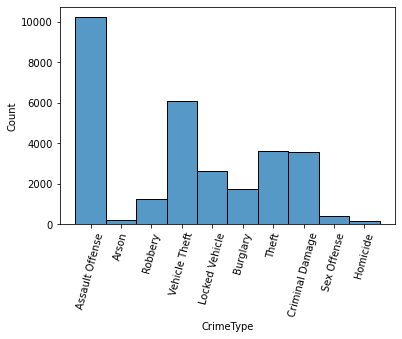

In [21]:
sns.histplot(data=crime, x='CrimeType')
plt.xticks(rotation=75)

I'm not clear why a list is output in addition to the histogram, but the histogram makes clear that assault is by far the most frequent crime reported, by approximately 4,000 records. Vehicle theft is the second most frequent crime, with about 6,000 thefts reported in 2022 so far. The least frequent crims are arson, homicide, and sex offense (I wonder if that last one is a reflection of under-reporting). 

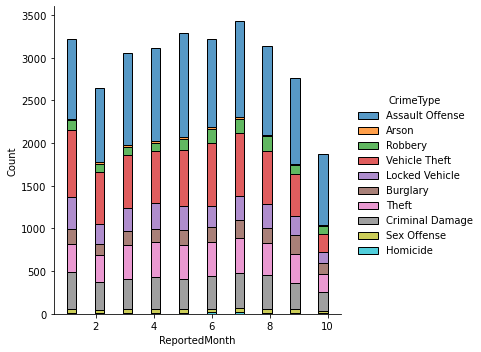

In [22]:
sns.displot(data=crime, x="ReportedMonth", hue="CrimeType", multiple="stack")

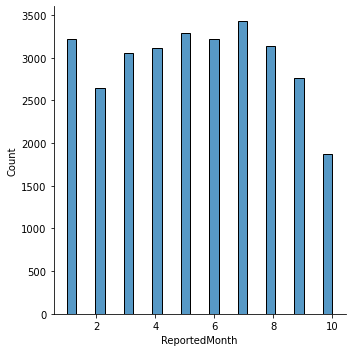

In [23]:
sns.displot(data=crime, x="ReportedMonth", multiple="stack")

Showing each crime type in a different color was more distracting than helpful in this case. Elminating the color coding makes it easier to see that February and October have the lowest crime report numbers (although the October data ends on 10/28, so we are seeing slightly less than a full month of data for October). Crimes peaked in July and then begin to decline.

Next I want to look at the relationships between crime totals and ZIP codes.

In [24]:
crime.groupby('ZIP').count().sort_values(by=['IncidentNum'], ascending=False)

,IncidentNum,ReportedDateTime,ReportedYear,ReportedMonth,WeaponUsed,ALD,POLICE,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,CrimeType
ZIP,,,,,,,,,,,,,,,,,,
53202,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406
53218,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
53209,2256,2256,2256,2256,2256,2256,2256,2256,2256,2256,2256,2256,2256,2256,2256,2256,2256,2256
53212,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255
53204,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218
53215,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948
53216,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878
53206,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810
53208,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748


I'm realizing it would be helpful to have population data for each ZIP code to see if there is a relationship between population and number of crimes. I'm also realizing 31 ZIP codes is a lot to look at it any single visualization. ALD, or aldermanic districts, cuts that number in half, and the city has a dataset showing population by aldermanic district, so I'm going to attempt to bring that in and merge the two together.

In [25]:
ald_pop = pd.read_csv('pop_district.csv')
ald_pop

,ALD,TotalPopulation
0,1,38515.0
1,2,41707.0
2,3,39492.0
3,4,38607.0
4,5,38953.0
5,6,39510.0
6,7,40029.0
7,8,39580.0
8,9,38739.0
9,10,39467.0


In [26]:
#dropping bottom 4 rows because they are not districts
ald_pop.drop(ald_pop.tail(4).index,inplace=True)

In [27]:
ald_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ALD              15 non-null     object 
 1   TotalPopulation  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 360.0+ bytes


In [28]:
#converting ALD and population to integer so it matches the crime dataframe
ald_pop['ALD'] = ald_pop['ALD'].astype(int)
ald_pop['TotalPopulation'] = ald_pop['TotalPopulation'].astype(int)
ald_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ALD              15 non-null     int64
 1   TotalPopulation  15 non-null     int64
dtypes: int64(2)
memory usage: 360.0 bytes


In [29]:
#merging the two dataframes on ALD 
crime_pop = ald_pop.merge(crime, how='left', left_on='ALD', right_on='ALD')
crime_pop

,ALD,TotalPopulation,IncidentNum,ReportedDateTime,ReportedYear,ReportedMonth,WeaponUsed,POLICE,ZIP,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,CrimeType
0,1,38515,223010034,2022-10-28 06:20:00,2022,10,None,7,53218,0,1,0,0,0,0,0,0,0,0,Assault Offense
1,1,38515,223010010,2022-10-28 00:32:00,2022,10,PERSONAL WEAPON,4,53209,0,1,0,0,0,0,0,0,0,0,Assault Offense
2,1,38515,223010005,2022-10-27 23:56:00,2022,10,PERSONAL WEAPON,4,53209,0,1,0,0,0,0,0,0,0,0,Assault Offense
3,1,38515,223000081,2022-10-27 11:00:00,2022,10,HANDGUN,4,53209,0,1,0,0,0,0,0,0,0,0,Assault Offense
4,1,38515,222990159,2022-10-26 19:24:00,2022,10,"LETHAL CUTTING INSTRUMENT,PERSONAL WEAPON",5,53209,0,1,0,0,0,0,0,0,0,0,Assault Offense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29745,15,39117,220010064,2022-01-01 03:00:00,2022,1,PERSONAL WEAPON,3,53210,0,1,0,0,0,0,0,0,0,0,Assault Offense
29746,15,39117,220010034,2022-01-01 02:06:25,2022,1,PERSONAL WEAPON,3,53208,0,1,0,0,0,0,0,0,0,0,Assault Offense
29747,15,39117,220090095,2022-01-01 01:00:00,2022,1,None,3,53205,0,0,0,0,0,1,0,0,0,0,Locked Vehicle
29748,15,39117,220010031,2022-01-01 00:00:00,2022,1,FIREARM,3,53206,0,1,0,0,0,0,0,0,0,0,Assault Offense


In [30]:
#adding a column that assigns a numeric value to each CrimeType for correlation analysis
crime_pop['CrimeCode'] = crime_pop['CrimeType']
crime_pop.CrimeType.unique()

array(['Assault Offense', 'Criminal Damage', 'Burglary', 'Vehicle Theft',
       'Theft', 'Locked Vehicle', 'Robbery', 'Sex Offense', 'Arson',
       'Homicide'], dtype=object)

In [31]:
dict = {'Assault Offense': 1, 'Criminal Damage': 2, 'Burglary': 3, 'Vehicle Theft': 4,
       'Theft': 5, 'Locked Vehicle': 6, 'Robbery': 7, 'Sex Offense': 8, 'Arson': 9,
       'Homicide': 10}
crime_pop.replace({'CrimeCode': dict}, inplace=True)

In [32]:
#dropping the individual crime type columns since they are redundant now. 
crime_pop.drop(['AssaultOffense', 'CriminalDamage', 'Burglary', 'VehicleTheft',
       'Theft', 'LockedVehicle', 'Robbery', 'SexOffense', 'Arson',
       'Homicide'], axis=1, inplace=True)

In [33]:
crime_pop

,ALD,TotalPopulation,IncidentNum,ReportedDateTime,ReportedYear,ReportedMonth,WeaponUsed,POLICE,ZIP,CrimeType,CrimeCode
0,1,38515,223010034,2022-10-28 06:20:00,2022,10,None,7,53218,Assault Offense,1
1,1,38515,223010010,2022-10-28 00:32:00,2022,10,PERSONAL WEAPON,4,53209,Assault Offense,1
2,1,38515,223010005,2022-10-27 23:56:00,2022,10,PERSONAL WEAPON,4,53209,Assault Offense,1
3,1,38515,223000081,2022-10-27 11:00:00,2022,10,HANDGUN,4,53209,Assault Offense,1
4,1,38515,222990159,2022-10-26 19:24:00,2022,10,"LETHAL CUTTING INSTRUMENT,PERSONAL WEAPON",5,53209,Assault Offense,1
...,...,...,...,...,...,...,...,...,...,...,...
29745,15,39117,220010064,2022-01-01 03:00:00,2022,1,PERSONAL WEAPON,3,53210,Assault Offense,1
29746,15,39117,220010034,2022-01-01 02:06:25,2022,1,PERSONAL WEAPON,3,53208,Assault Offense,1
29747,15,39117,220090095,2022-01-01 01:00:00,2022,1,None,3,53205,Locked Vehicle,6
29748,15,39117,220010031,2022-01-01 00:00:00,2022,1,FIREARM,3,53206,Assault Offense,1


In [34]:
#correlation matrix for the numeric variables
corrmat = crime_pop.corr()
corrmat

,ALD,TotalPopulation,ReportedYear,ReportedMonth,POLICE,ZIP,CrimeCode
ALD,1.000000,0.070411,NaN,0.000621,0.005261,-0.107592,0.001041
TotalPopulation,0.070411,1.000000,NaN,-0.012644,0.119961,0.122477,-0.012307
ReportedYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReportedMonth,0.000621,-0.012644,NaN,1.000000,-0.012531,-0.015791,-0.028828
POLICE,0.005261,0.119961,NaN,-0.012531,1.000000,0.380338,-0.096411
ZIP,-0.107592,0.122477,NaN,-0.015791,0.380338,1.000000,-0.070771
CrimeCode,0.001041,-0.012307,NaN,-0.028828,-0.096411,-0.070771,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

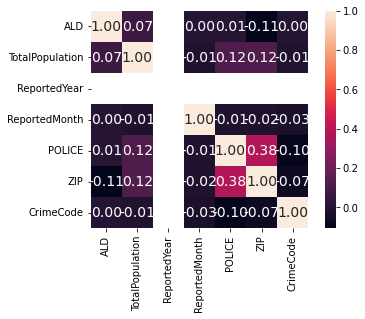

In [35]:
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14})
plt.show

Correlations are all pretty small except for POLICE and ZIP, which isn't particularly meaningful since police districts would typically take crime reports for the ZIP codes in their district. So there's no relationship between aldermanic districts, population, and individual crime types, but perhaps that changes if we look at the total crime reports by location/population.

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>],
       [<AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>, <AxesSubplot:>]],
      dtype=object)

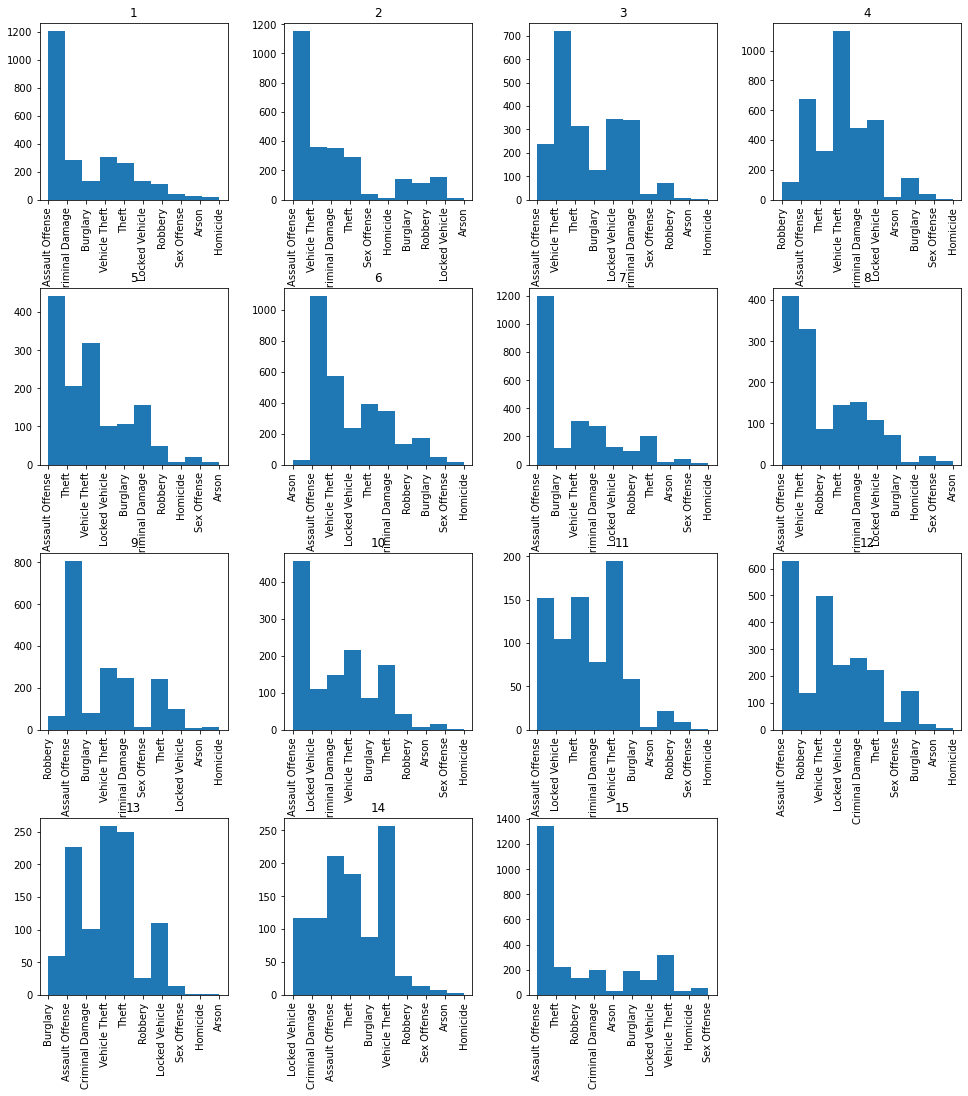

In [36]:
crime_pop['CrimeType'].hist(by=crime_pop['ALD'],figsize = (16,18))

In [37]:
#different axes on each histogram so looking at crime totals and proportion of each type
crime_types = crime_pop.groupby('CrimeType').size()
crime_types

CrimeType
Arson                204
Assault Offense    10220
Burglary            1714
Criminal Damage     3541
Homicide             133
Locked Vehicle      2629
Robbery             1228
Sex Offense          415
Theft               3589
Vehicle Theft       6077
dtype: int64

In [38]:
all_crimes = len(crime_pop)
all_crimes

29750

In [39]:
prop_crimes = crime_types/all_crimes
prop_crimes

CrimeType
Arson              0.006857
Assault Offense    0.343529
Burglary           0.057613
Criminal Damage    0.119025
Homicide           0.004471
Locked Vehicle     0.088370
Robbery            0.041277
Sex Offense        0.013950
Theft              0.120639
Vehicle Theft      0.204269
dtype: float64

In [44]:
ald_crimes = crime_pop.groupby('ALD').size()
ald_crimes

ALD
1     2505
2     2627
3     2183
4     3462
5     1410
6     3039
7     2402
8     1336
9     1866
10    1256
11     774
12    2192
13    1044
14    1024
15    2630
dtype: int64

In [45]:
dist_crimes = ald_crimes/all_crimes
dist_crimes

ALD
1     0.084202
2     0.088303
3     0.073378
4     0.116370
5     0.047395
6     0.102151
7     0.080739
8     0.044908
9     0.062723
10    0.042218
11    0.026017
12    0.073681
13    0.035092
14    0.034420
15    0.088403
dtype: float64

Districts 4 and 6 have the largest proportion of reported crimes at 12% and 10%, respectively. Assault Offense and Vehicle Theft are the two largest categories, so I'm going to focus on those two categories and compare differences across districts.

In [40]:
#creating a list to use to filter rows with the top two crimes by CrimeCode (after much trial and error trying to use the CrimeType category--more issues because it is an objec/text value)
topcrimes = [1, 4]
topcrimes

[1, 4]

In [41]:
top_crimes = crime_pop[crime_pop['CrimeCode'].isin(topcrimes)]
top_crimes.tail()

,ALD,TotalPopulation,IncidentNum,ReportedDateTime,ReportedYear,ReportedMonth,WeaponUsed,POLICE,ZIP,CrimeType,CrimeCode
29743,15,39117,220010053,2022-01-01 03:47:42,2022,1,PERSONAL WEAPON,3,53205,Assault Offense,1
29744,15,39117,220090008,2022-01-01 03:30:00,2022,1,ASPHYXIATION,3,53208,Assault Offense,1
29745,15,39117,220010064,2022-01-01 03:00:00,2022,1,PERSONAL WEAPON,3,53210,Assault Offense,1
29746,15,39117,220010034,2022-01-01 02:06:25,2022,1,PERSONAL WEAPON,3,53208,Assault Offense,1
29748,15,39117,220010031,2022-01-01 00:00:00,2022,1,FIREARM,3,53206,Assault Offense,1


In [42]:
import matplotlib.pyplot as plt
#imported this because I wasn't sure if I had before and was having issues with the Seaborn plot I was trying to run. Restarting the kernel and rerunning the cells fixed it

<AxesSubplot:xlabel='ALD', ylabel='count'>

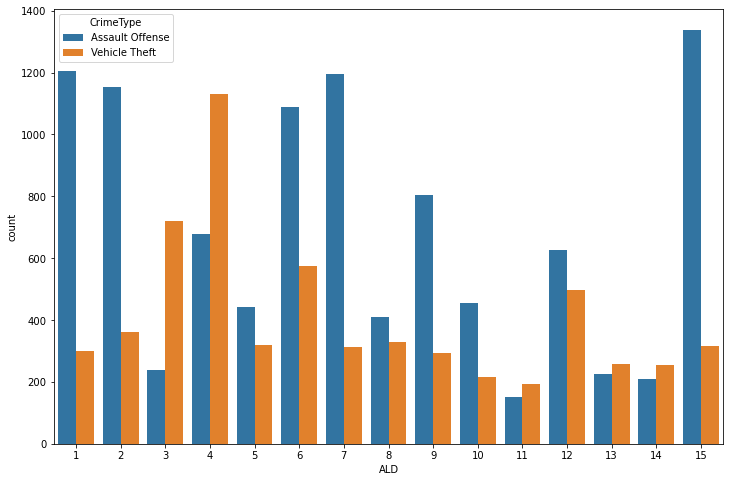

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=top_crimes, x="ALD", hue="CrimeType")

This chart offers some interesting insights about the data. Most districts have more assaults than vehicle thefts, but the differences are particularly large in districts 1, 2, 6, 7, 9, and 15. Districts 3 and 4 are the opposite, with considerably more vehicle thefts than assaults. A quick glance at a map of the aldermanic districts (https://city.milwaukee.gov/election/HowtoRunforPublicOffice/District-Maps/Map-City-of-Milwaukee-Alderman) shows me that districts 3 and 4 include downtown, the east side, and the UW-Milwaukee and Marquette University college campuses. Since those are heavy traffic areas of the city, that might explain the higher number of vehicle thefts in those districts. I also notice districts 11, 13 and 14 have the lowest rates of assaults and vehicle thefts, which is consisten with them having the lowest overall proportion of crimes at about 3% each. These are all of the southernmost districts in the city, suggeseting that is a safer area of the city to live (though it could also suggest crimes are under-reported in those areas; it would be interesting to compare this data to police presence/patrol patterns).